# Retriving the Data from Amazon Html pages using WebScraping

from bs4 import BeautifulSoup
import openpyxl

# Load the HTML file
for i in range(20):
    url= r'C:\Users\sailo\Downloads\HTML Files Laptop\laptops{}.html'.format(i+1)
    with open(url, encoding='utf-8') as file:
        html_content = file.read()

    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all divs with the specified class
    results = soup.find_all("div", class_="sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16")

    # Create or load the Excel file
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    sheet.title = "Laptop Data"

    # Write headers
    sheet['A1'] = 'Link'
    sheet['B1'] = 'Title'
    sheet['C1'] = 'Rating'
    sheet['D1'] = 'Price'

    row = 2  # Start from the second row to write data
    for result in results:
        # Find the image link if available
        img_tag = result.find("img", class_="s-image")
        link = img_tag['src'] if img_tag else ''

        # Find the title if available
        title_tag = result.find("span", class_="a-size-medium a-color-base a-text-normal")
        title = title_tag.get_text() if title_tag else ''

        # Find the rating if available
        rating_tag = result.find("span", class_="a-icon-alt")
        rating = rating_tag.get_text() if rating_tag else ''

        # Find the price if available
        price_tag = result.find("span", class_="a-price-whole")
        price = price_tag.get_text() if price_tag else ''

        # Write the data to the Excel file
        sheet[f'A{row}'] = link
        sheet[f'B{row}'] = title
        sheet[f'C{row}'] = rating
        sheet[f'D{row}'] = price

        row += 1

    # Save the workbook
    data=f'Laptop_Extradata{i+1}.xlsx'
    workbook.save(data)


In [1]:
import pandas as pd
import numpy as np


In [77]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data=pd.read_excel(r"C:\Users\sailo\Downloads\ML models\What Laptop You Should Buy\Laptop Data\Processing.xlsx")

# Data Preprocessing Part 1: Data Cleaning

Finding the Regular Patterns using re module in python and parsing the main sentence into required features

In [3]:
Convert=Data['Title']

In [4]:
Brand=[]
ProductName=[]
RAM=[]
Storage=[]
Size=[]
Gaming=[]
FingerPrint=[]
OLED=[]
SSD=[]
Renewed=[]
Processor=[]


In [5]:
import re

for index,i in enumerate(Convert):
    text = i

    # Define regular expressions for each attribute
    ram_pattern = re.compile(r'(\d+)\s?GB',re.IGNORECASE)
    processor_pattern = re.compile(r'([i]\d-?\s?\d*u?|ryzen\s?\w*\d+\s?-?\d*(u|h|hs)?|Athlon\s?\w*\s?\d*U?|M1 chip|gemini\s\w*\sn4020|mediatek 8788| celeron\s?N\d+|intel\s?\w+\s\w+\sn?\d+)',re.IGNORECASE)
    storage_pattern = re.compile(r'((([1-9][0-9][0-9]|64)\s?(GB|ssd))|(\d+\s?TB))',re.IGNORECASE)
    size_pattern = re.compile(r'(\d+\.?\d*)(\s|-)?(cm|inch|")',re.IGNORECASE)
#     graphic_pattern = re.compile(r'\w*\sGraphics')
    gaming_pattern=re.compile(r'(gaming)',re.IGNORECASE)
    ssd_pattern=re.compile(r'(ssd)',re.IGNORECASE)
    brand_pattern=re.compile(r'(hp|acer|lenovo|dell|asus|apple|jio|msi|avita|samsung|zebronics|Honor|microsoft|xiaomi|walker|chuwi|redmi|axl|realme|fujitsu|futopia|agb)',re.IGNORECASE)
    productName_pattern=re.compile(r'(hp\s?\w*|acer\s?\w*|lenovo\s?\w*|dell\s?\w*|asus\s?\w*|apple\s?\w*|jio\s?\w*|msi\s?\w*|avita\s?\w*|samsung\s?\w*|zebronics\s?\w*|Honor\s?\w*|microsoft\s?\w*|xiaomi\s?\w*|walker\s?\w*|chuwi\s?\w*|redmi\s?\w*|axl\s?\w*|realme\s?\w*|fujitsu\s?\w*|futopia\s?\w*|agb\s?\w*)',re.IGNORECASE)
    finger_pattern=re.compile(r'(finger\s?print)',re.IGNORECASE)
    renewed_pattern=re.compile(r'(renewed|refurbished)',re.IGNORECASE)
    oled_pattern=re.compile(r'oled',re.IGNORECASE)
    
    # Find matches for each attribute
    ram = re.search(ram_pattern, text)
    processor = re.search(processor_pattern, text)
    storage = re.search(storage_pattern, text)
    size = re.search(size_pattern, text)
#     graphic = re.search(graphic_pattern, text)
    gaming=re.search(gaming_pattern,text)
    ssd=re.search(ssd_pattern,text)
    fingerprint=re.search(finger_pattern,text)
    brand=re.search(brand_pattern,text)
    renewed=re.search(renewed_pattern,text)
    oled=re.search(oled_pattern,text)
    productName=re.search(productName_pattern,text)



    # Extract the values
    ram_value = ram.group() if ram else None
    processor_value = processor.group() if processor else None
    storage_value = storage.group() if storage else None
    size_value = size.group() if size else None
#     graphic_value = 1 if graphic else 0
    gaming_or_not= 1 if gaming else 0
    ssd_or_not=1 if ssd else 0
    FingerPrint_or_not= 1 if fingerprint else 0
    brand_value=brand.group() if brand else None
    renewed_or_not=1 if renewed else 0
    oled_or_not=1 if oled else 0
    ProductName_value=productName.group() if productName else None


    # Display the extracted attributes
#     print("{")
#     print("Brand:",brand_value)
#     print("Prodct Name:",ProductName_value)
#     print("RAM:", ram_value)
#     print("Processor:", processor_value)
#     print("Storage:", storage_value)
#     print("Size:", size_value)
#     print("Graphic:", graphic_value)
#     print("Gaming:",gaming_or_not)
#     print("SSD:",ssd_or_not)
#     print("Finger Print:",FingerPrint_or_not)
#     print("OLED:",oled_or_not)
#     print("Renewed:",renewed_or_not)
#     print("}")
    Brand.append(brand_value)
    ProductName.append(ProductName_value)
    RAM.append(ram_value)
    Storage.append(storage_value)
    Size.append(size_value)
#     Graphic.append(graphic_value)
    Gaming.append(gaming_or_not)
    FingerPrint.append(FingerPrint_or_not)
    OLED.append(oled_or_not)
    SSD.append(ssd_or_not)
    Renewed.append(renewed_or_not)
    Processor.append(processor_value)

In [6]:
Data["Brand"]=Brand
Data["ProductName"]=ProductName
Data["Processor"]=Processor
Data["RAM"]=RAM
Data["Storage"]=Storage
Data["Size"]=Size
# Data["Graphic"]=Graphic
Data["Gaming"]=Gaming
Data["FingerPrint"]=FingerPrint
Data["OLED"]=OLED
Data["SSD"]=SSD
Data["Renewed"]=Renewed

In [7]:
Data.head()

,Link,Title,Rating,Price,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed
0,./Amazon.in _ laptops_files/51qGdtu8+RL._AC_UY...,(Refurbished) Lenovo ThinkPad 6th Gen Intel Co...,4.0 out of 5 stars,15849.0,Lenovo,Lenovo ThinkPad,i5,8 GB,256 GB,"14""",0,0,0,1,1
1,./Amazon.in _ laptops_files/71kJlKb2r8L._AC_UY...,"ASUS Vivobook 15, Intel Celeron N4020, 15.6"" (...",3.9 out of 5 stars,26990.0,ASUS,ASUS Vivobook,Celeron N4020,8GB,512GB,"15.6""",0,1,0,1,0
2,./Amazon.in _ laptops_files/71Blj59DzzL._AC_UY...,"HP Laptop 15s, 12th Gen Intel Core i3-1215U, 1...",4.1 out of 5 stars,39699.0,HP,HP Laptop,i3-1215U,8GB,512GB,15.6-inch,0,0,0,1,0
3,./Amazon.in _ laptops_files/71R-AObyPFL._AC_UY...,"HP 255 G8 Notebook PC,AMD Ryzen 3 3250U, 15.6 ...",4.1 out of 5 stars,28850.0,HP,HP 255,Ryzen 3 3250U,8GB,512GB,15.6 inch,0,0,0,1,0
4,./Amazon.in _ laptops_files/6108kY7UAtL._AC_UY...,(Refurbished) Lenovo ThinkPad 5th Gen Intel Co...,3.3 out of 5 stars,14999.0,Lenovo,Lenovo ThinkPad,i5,16 GB,256 GB,"14""",0,0,0,1,1


In [8]:
Data=Data.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,2,3]]

In [9]:
Data.head()

,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed,Rating,Price
0,Lenovo,Lenovo ThinkPad,i5,8 GB,256 GB,"14""",0,0,0,1,1,4.0 out of 5 stars,15849.0
1,ASUS,ASUS Vivobook,Celeron N4020,8GB,512GB,"15.6""",0,1,0,1,0,3.9 out of 5 stars,26990.0
2,HP,HP Laptop,i3-1215U,8GB,512GB,15.6-inch,0,0,0,1,0,4.1 out of 5 stars,39699.0
3,HP,HP 255,Ryzen 3 3250U,8GB,512GB,15.6 inch,0,0,0,1,0,4.1 out of 5 stars,28850.0
4,Lenovo,Lenovo ThinkPad,i5,16 GB,256 GB,"14""",0,0,0,1,1,3.3 out of 5 stars,14999.0


## Convering the Data of each Feature into same unit

In [10]:
#converting Storage data

In [11]:
# 1 TB = 1024 GB
Data["Storage"].replace("1 TB","1024 GB",inplace=True)
Data["Storage"].replace("1TB","1024 GB",inplace=True)

In [12]:
# spliting numeric data from the combined data in Data["Storage"]

In [13]:
numecat=Data["Storage"].str.split('(\d+)',expand=True)

Data["Storage"]=numecat[1].astype(int)

In [14]:
#converting RAM data

In [15]:
numecat=Data["RAM"].str.split('(\d+)',expand=True)

Data["RAM"]=numecat[1].astype(int)

In [16]:
#converting Size data

In [17]:
numecat=Data["Size"].str.split('(\d+\.?\d*)\s?-?([a-zA-Z]+|")',expand=True)

numecat[1]=numecat[1].astype(float)

# 1 cm = 0.3937 inches
temp=numecat.index[(numecat[2]=='cm')|(numecat[2]=='CM')|(numecat[2]=='Cm')|(numecat[2]=='cM')].tolist()

numecat.iloc[temp,1]*=0.3937

Data["Size"]=numecat[1]

In [18]:
# converting Rating data

In [19]:
numecat=Data["Rating"].str.split('(\d+\.\d*)',expand=True)

Data["Rating"]=numecat[1].astype(float)

Data["Brand"]=Data["Brand"].apply(str.upper)

In [20]:
Data.select_dtypes("object").columns

Index(['Brand', 'ProductName', 'Processor'], dtype='object')

In [21]:
Data.isnull().sum()

Brand           0
ProductName     0
Processor       0
RAM             0
Storage         0
Size            0
Gaming          0
FingerPrint     0
OLED            0
SSD             0
Renewed         0
Rating         18
Price           1
dtype: int64

<font color='blue'>Here there is one null value in price , so we can drop that row but there are 18 null values in Rating , we can replace with mean of data.<font>

In [22]:
Data.drop(Data.index[Data['Price'].isna()==True],inplace=True)
Avg=Data["Rating"].mean()
Data["Rating"].fillna(Avg,inplace=True)

# Data Analysis


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Analysis of renewed laptops correlation with other features


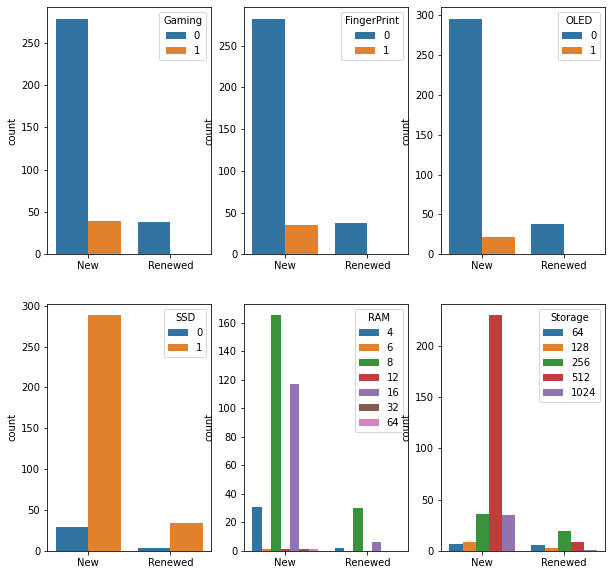

In [24]:
fig,axes=plt.subplots(2,3,figsize=(10,10))
Titles=[["Gaming","FingerPrint","OLED"],["SSD","RAM","Storage"]]
for i in range(2):
    for j in range(3):
        ax=sns.countplot(x=Data['Renewed'],hue=Data[Titles[i][j]],ax=axes[i,j])
        plt.sca(axes[i,j])
        plt.xticks([0,1],["New","Renewed"])
        ax.set(xlabel=None)
        axes[i,j].legend(loc="upper right",title=Titles[i][j])
plt.show()

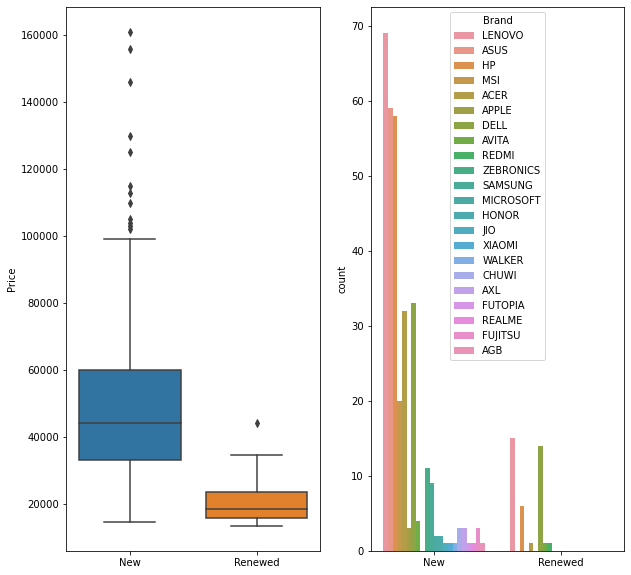

In [25]:
fig,axes=plt.subplots(1,2,figsize=(10,10))
fig1=sns.boxplot(x=Data["Renewed"],y=Data["Price"],ax=axes[0])
fig2=sns.countplot(x=Data["Renewed"],hue=Data["Brand"],ax=axes[1])
l=[fig1,fig2]
for i,j in enumerate(l):
    ax=j
    ax.set(xlabel=None)
    plt.sca(axes[i])
    plt.xticks([0,1],["New","Renewed"])

plt.show()

<font color='green'>No Renewed Laptop is Gaming or have Finger Print feature  or have OLED display but there are more percentage of SSD featured Renewed Laptops and there more percentage of 8 GB RAM Laptops Renewed  and more percent of 256 GB storage Laptops Renewed.</font>

<font color='blue'>"BY THIS ANALYSIS ONE CAN SEE THAT MOST RENEWED LAPTOPS ARE JUST AVERAGE FEATURED AND PRICE IS VERY LOW (MAX IS AROUND 40,000, AVG IS AROUND 20,000) WHEN COMPARED WITH NEW ONES AND MOST RENEWED BRAND IS LENOVO."<font>

2. Analysis of Brand

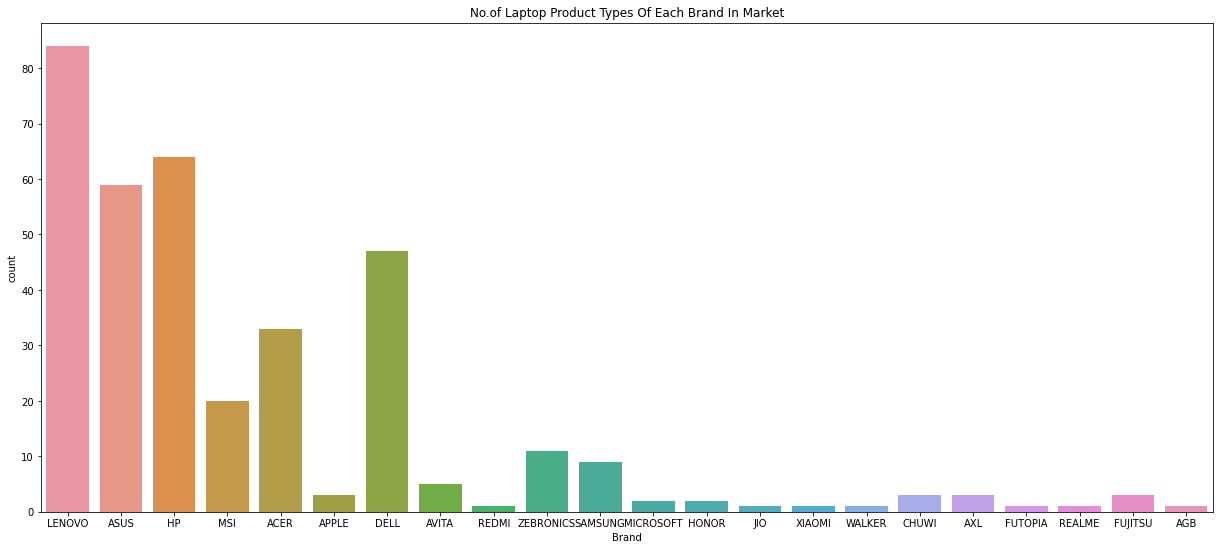

In [26]:
plt.figure(figsize=(21,9))
plt.title("No.of Laptop Product Types Of Each Brand In Market")
sns.countplot(x=Data["Brand"])
plt.show()

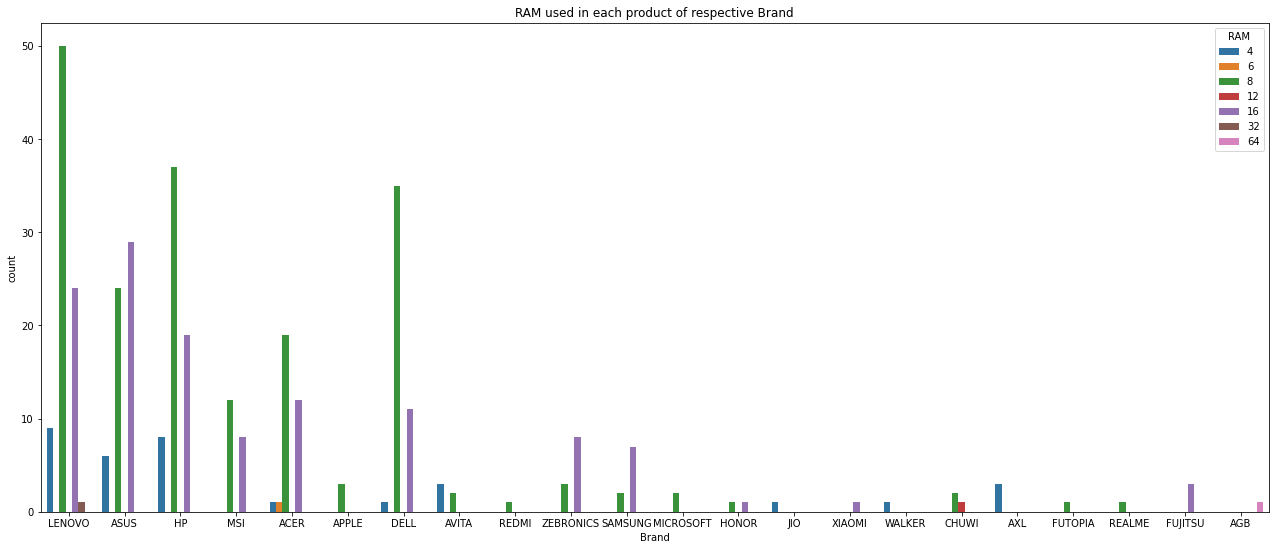

In [27]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["RAM"])
plt.legend(title="RAM",loc="upper right")
plt.title("RAM used in each product of respective Brand")
plt.show()

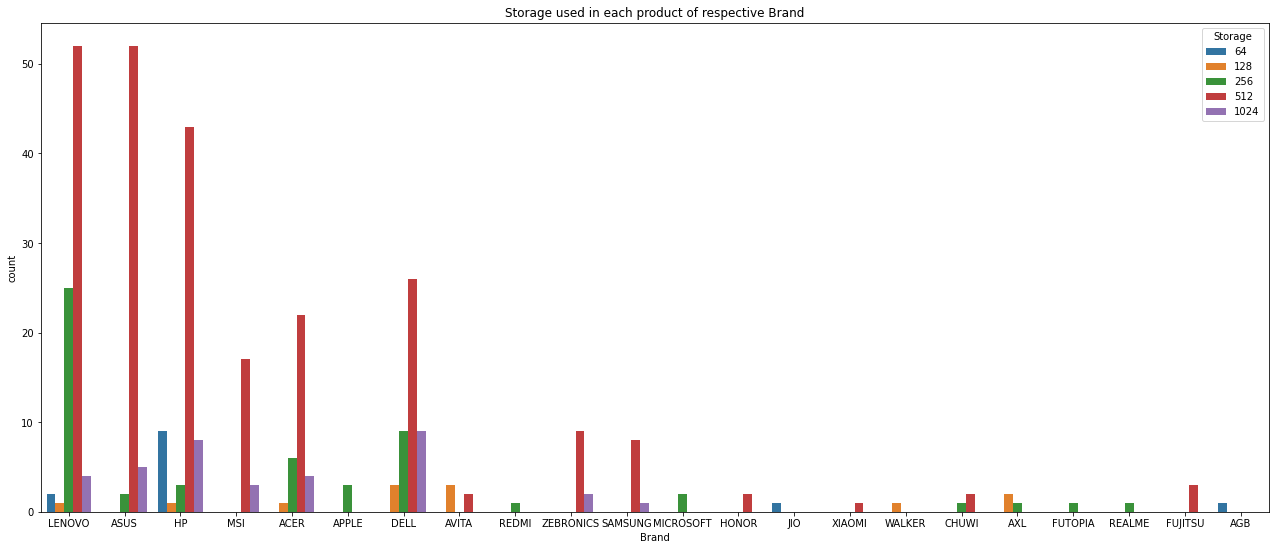

In [28]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["Storage"])
plt.legend(title="Storage",loc="upper right")
plt.title("Storage used in each product of respective Brand")
plt.show()

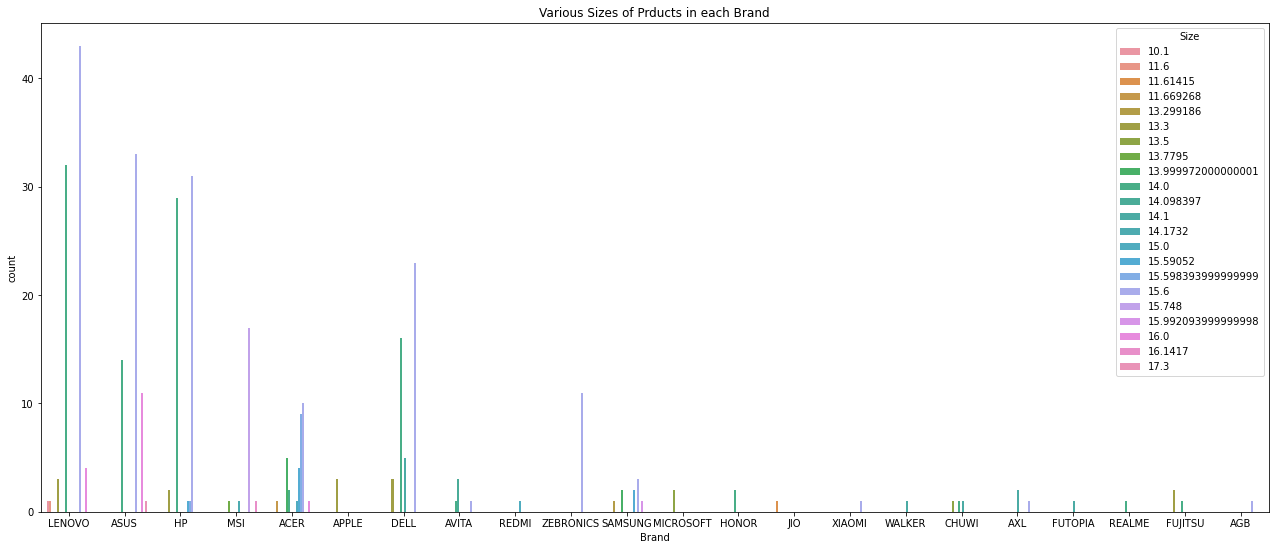

In [29]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["Size"])
plt.legend(title="Size",loc="upper right")
plt.title("Various Sizes of Prducts in each Brand")
plt.show()

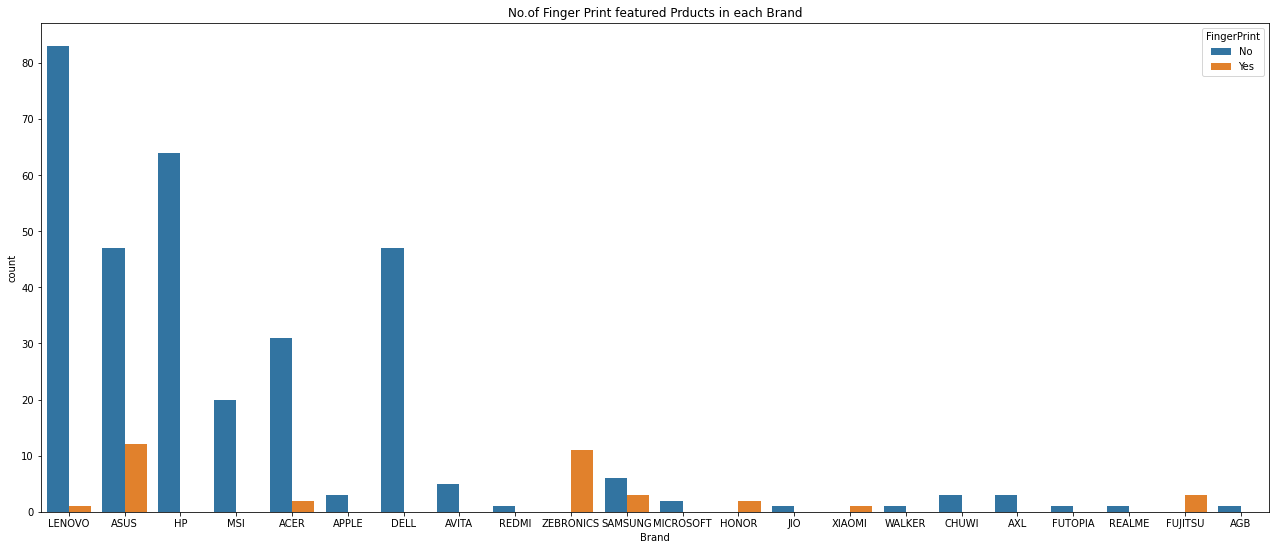

In [30]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["FingerPrint"])
plt.legend(title="FingerPrint",loc="upper right",labels=("No","Yes"))
plt.title("No.of Finger Print featured Prducts in each Brand")
plt.show()

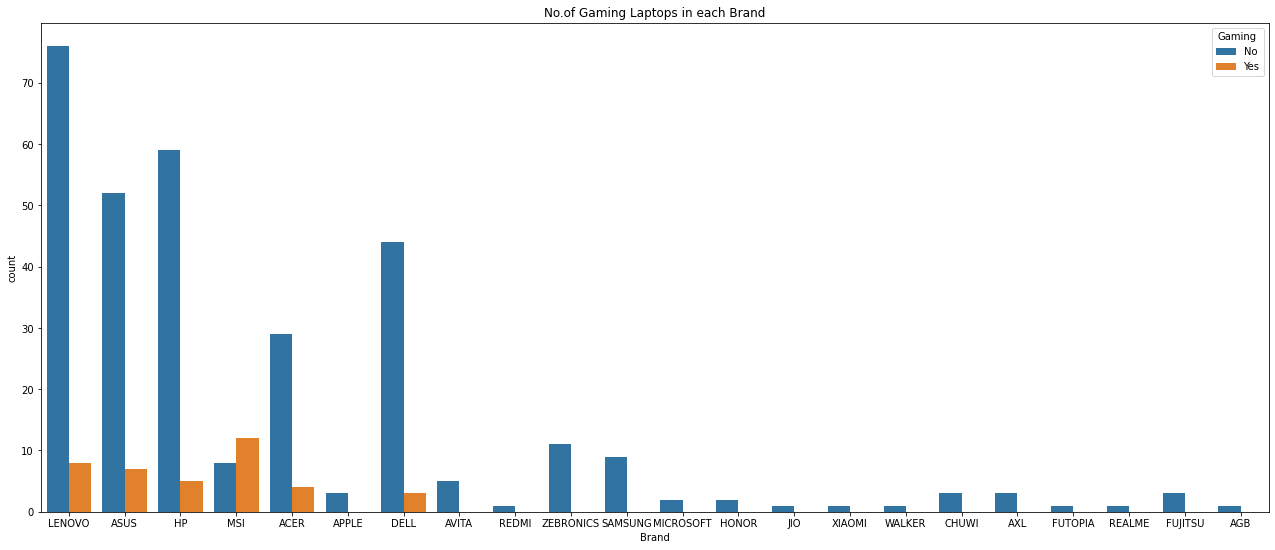

In [31]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["Gaming"])
plt.legend(title="Gaming",loc="upper right",labels=("No","Yes"))
plt.title("No.of Gaming Laptops in each Brand")
plt.show()

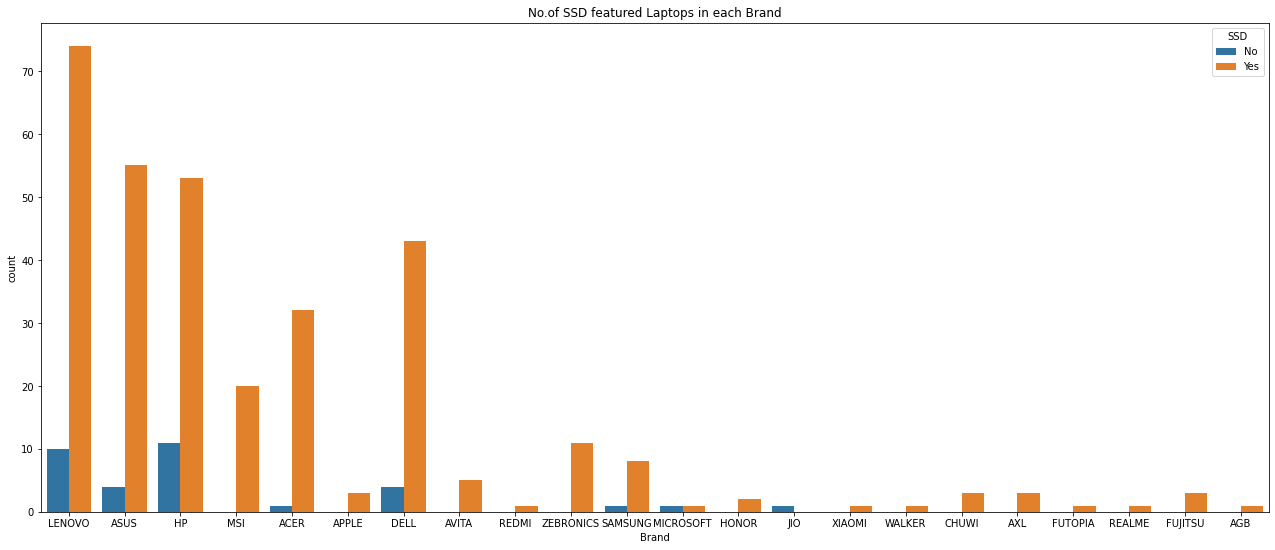

In [32]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["SSD"])
plt.legend(title="SSD",loc="upper right",labels=("No","Yes"))
plt.title("No.of SSD featured Laptops in each Brand")
plt.show()

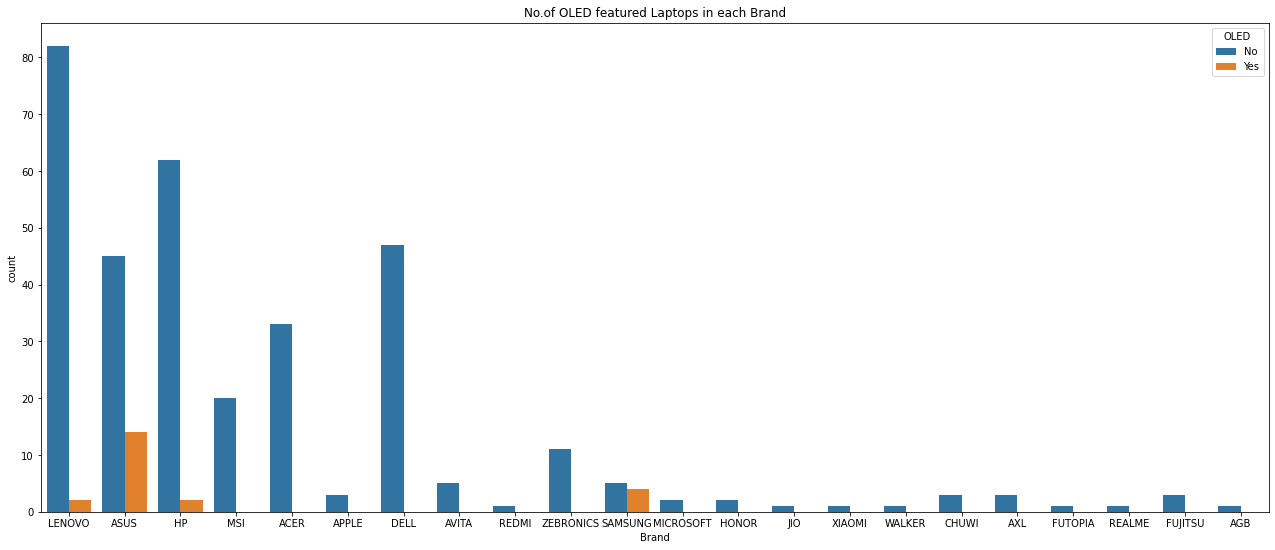

In [33]:
plt.figure(figsize=(22,9))
sns.countplot(x=Data["Brand"],hue=Data["OLED"])
plt.legend(title="OLED",loc="upper right",labels=("No","Yes"))
plt.title("No.of OLED featured Laptops in each Brand")
plt.show()

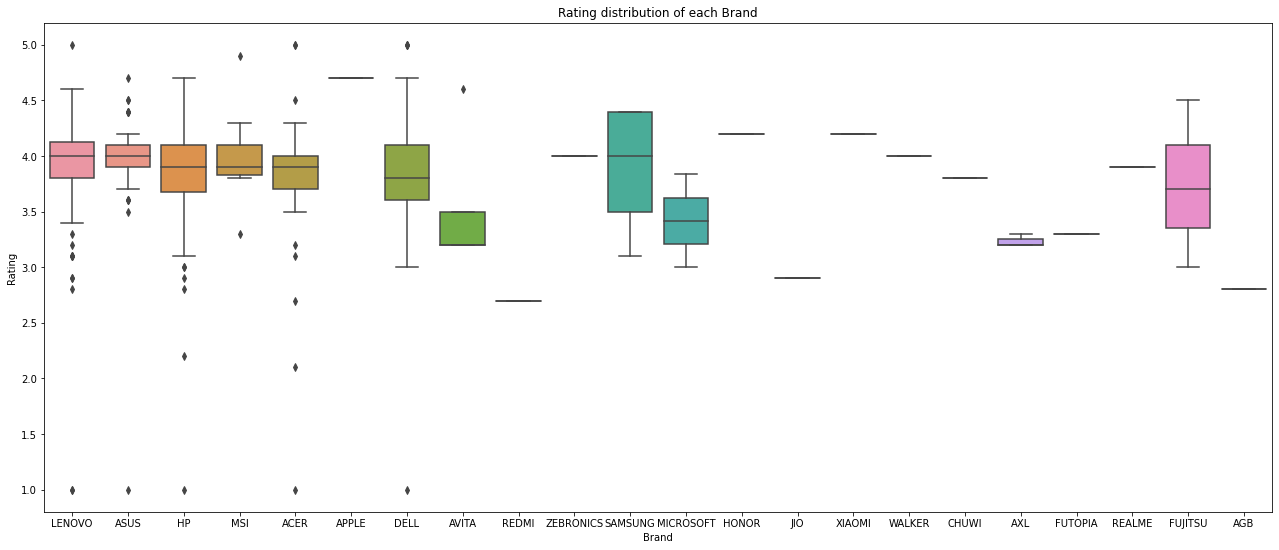

In [34]:
plt.figure(figsize=(22,9))
sns.boxplot(x=Data["Brand"],y=Data["Rating"])
plt.title("Rating distribution of each Brand")
plt.show()

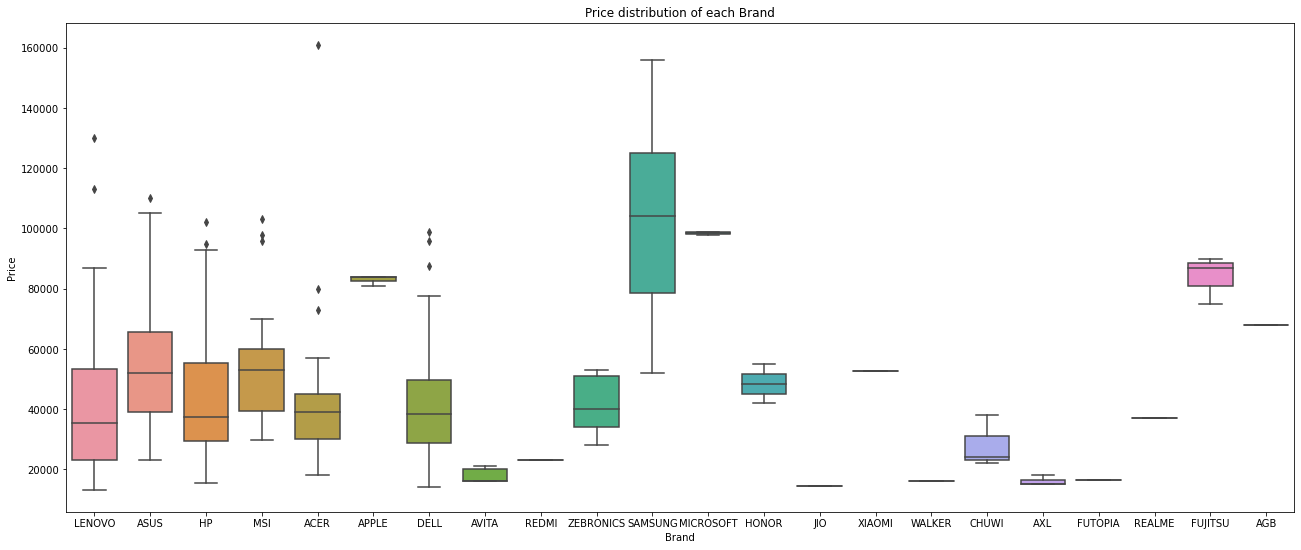

In [35]:
plt.figure(figsize=(22,9))
sns.boxplot(x=Data["Brand"],y=Data["Price"])
plt.title("Price distribution of each Brand")
plt.show()

<font color="green">In this Section ,<font>
    
<font color="Blue">From first graph: One can find that the more no.of laptop variations are selling by "Lenovo".<font>
    
<font color="Blue">From second graph: Most brands have higher percentage of "8 GB" RAM Laptops.<font>
    
<font color="Blue">From third graph: Most brands have higher percentage of "512 GB" storage Laptops.<font>
    
<font color="Blue">From fourth graph: Most brands have higher percentage of "15.6" inches Laptops.<font>
    
<font color="Blue">From  fifth,eighth graph: Mostly all brands have very few percentage of Finger Print,OLED featured (individually).<font>
    
<font color="Blue">From sixth graph: Mostly all brands provides higher number Non-Gaming Laptops.<font>
    
<font color="Blue">From  seventh graph: Mostly all brands provides "SSD" featured laptops.<font>
    
<font color="Blue">From Ninth graph: Mostly all brands are rated around "4".<font>
    
<font color="Blue">From Tenth graph:Mostly all brands Price distribution ranges (20,000 to 80,000) but samsung has very high price distribution compared with others   ranges from (50,000 to 1,50,000) (approx). <font>

3. In the Final Part of Data Analysis, We can correlate the Remaining Fetures using Pair Wise plot.

<Figure size 360x360 with 0 Axes>

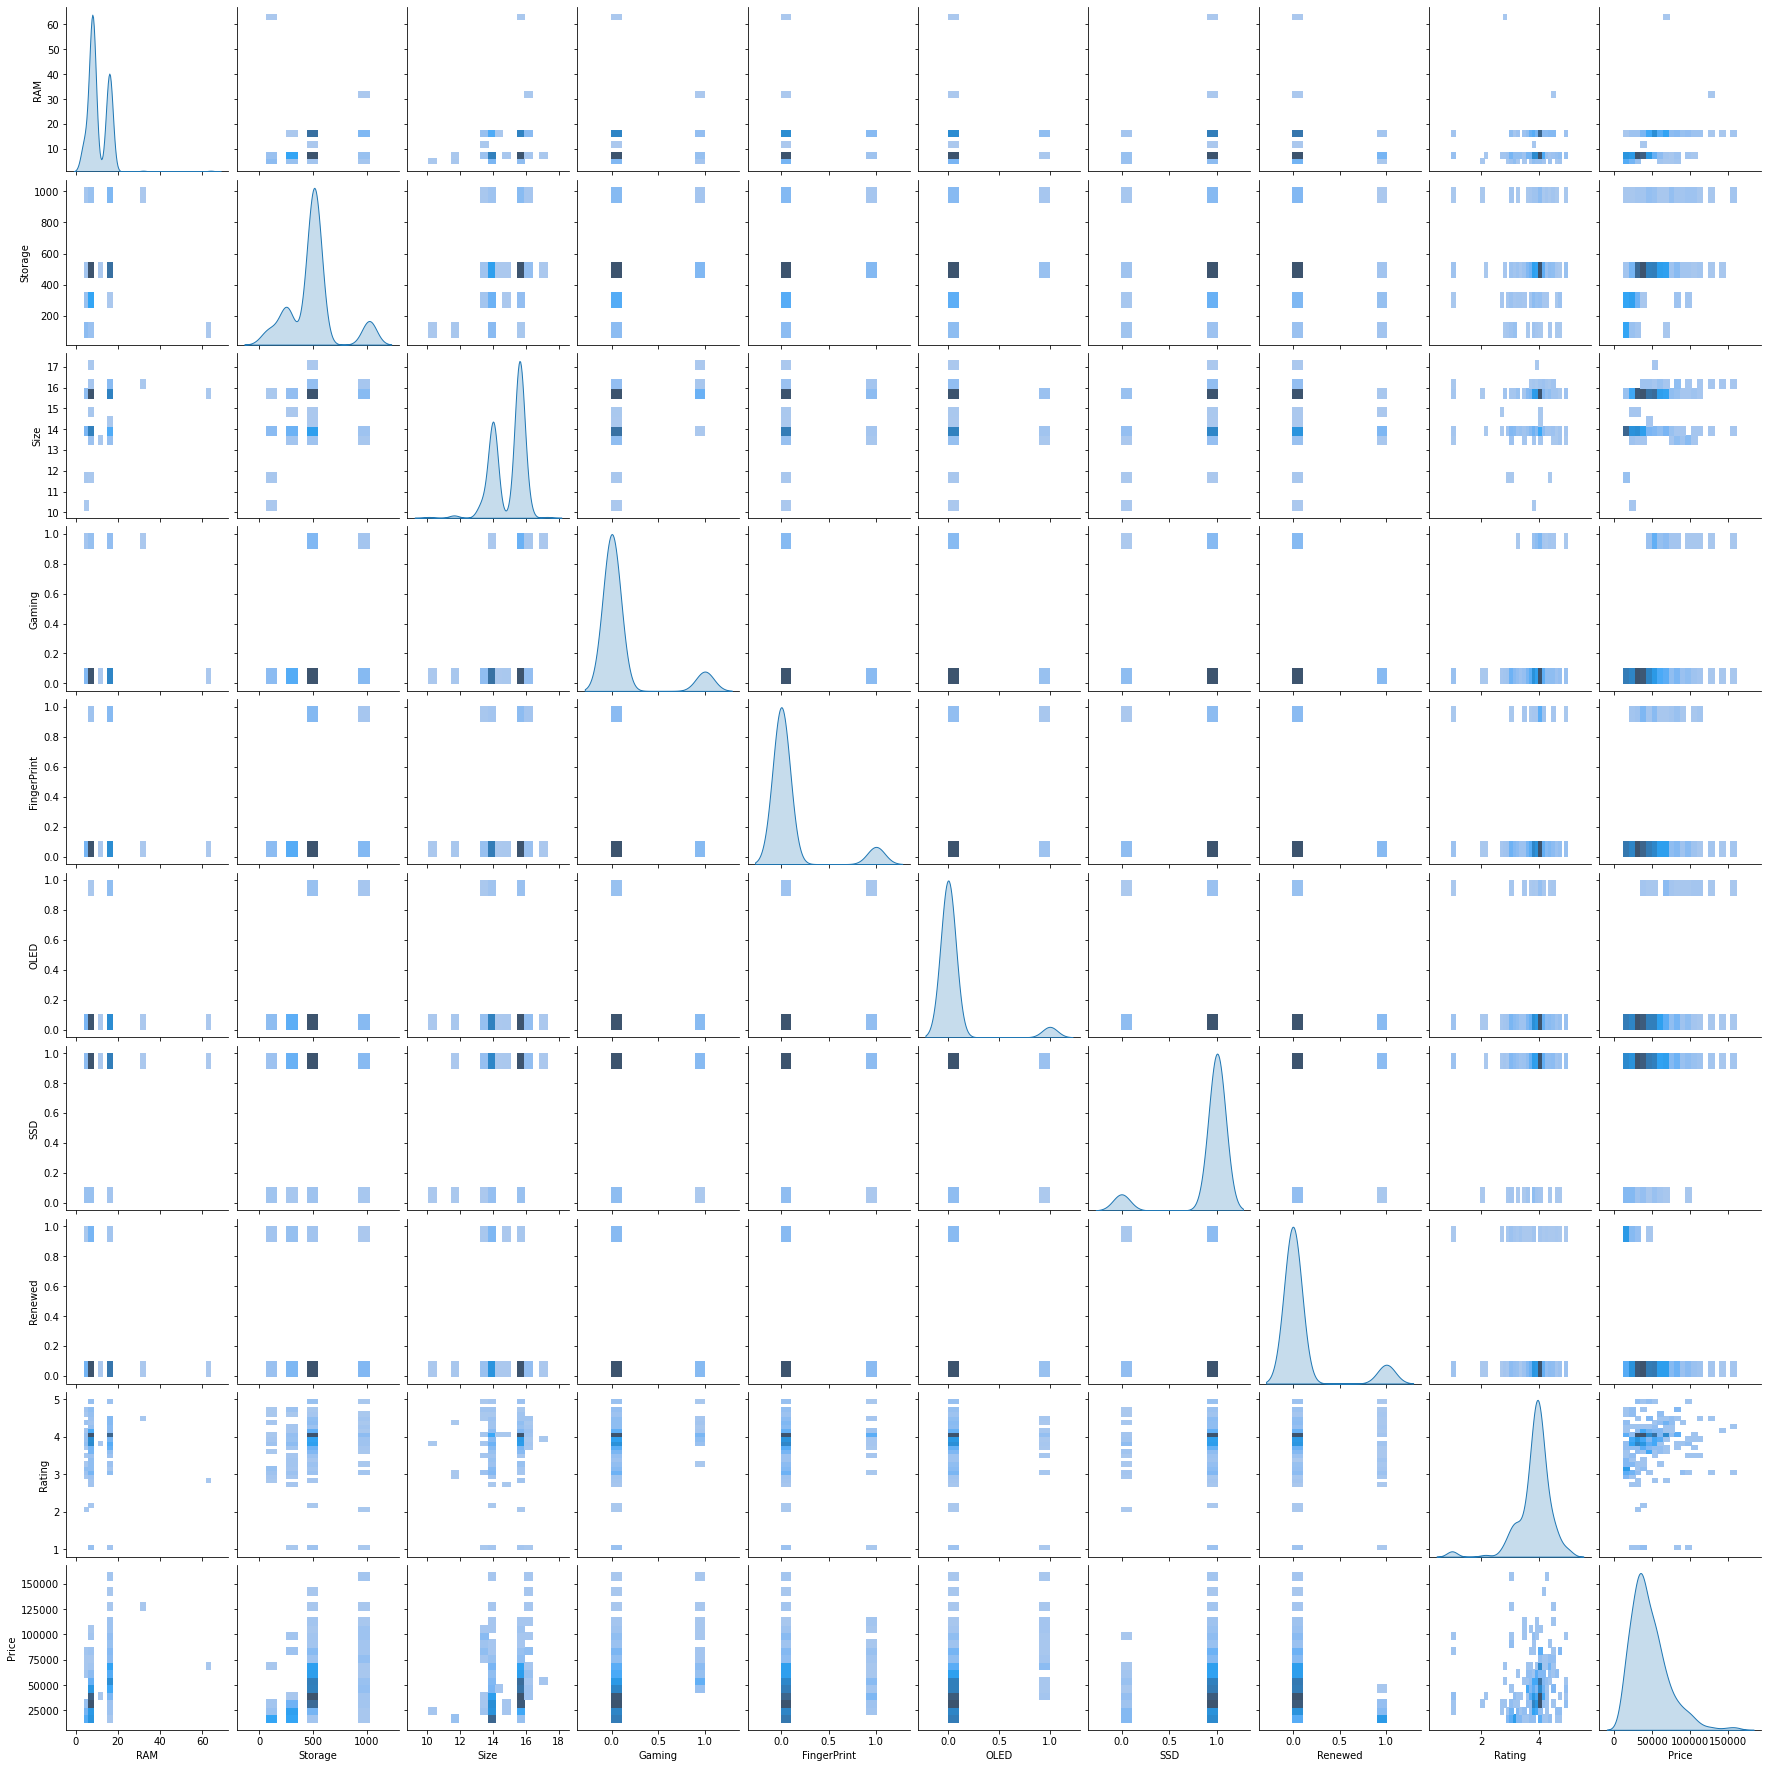

In [36]:
plt.figure(figsize=(5,5))
ax=sns.pairplot(Data,kind="hist",diag_kind='kde')
plt.show()

<font color='blue'>From off diagonal graphs in (Price vs Rating) graph one can observe that there is more density at the (price,Rating) value around (50,000,4) , in (Renewed vs Price) graph Renewed Laptops are priced less than 50,000 Rs , in  (Gaming vs Rating,Finger Print vs Rating,OLED vs Rating) graphs  Laptops which are featured with them have high rating distribution with minimum rating as around "3",in (Price vs SSD) graph the laptops which dont have SSD Price distributed less than 50,000 Rs,in (size vs Price) graph most laptops having 15.6 inches are in between 25,000 and 50,000Rs. <font>

<font color="blue">From the above graphs one can observe that there are more number of "8 GB" RAM ,"512 GB" Storage,"15.6" inches screen size, "Non Gaming","No Finger Print Featured", "No OLED Featured", "No SSD Featured","New",around "4 points" Rated,around "50,000 Rs" priced Laptops.<font>

# Data Preprocessing Part 2

### By Label Encoding tronsforming the ordinal Categorical values of Processors into numerical values by considering there Thermal Design Power(TDP) ratings and dividing them into 3 classes.

#### <font color='green'>Processor Order By Considering their Power<font>
    

<font color="blue">Lowest Power (Lowest Generation):<font>

<font color='grey'>Celeron N4020 / Celeron N4500 / Celeron N4120<font>
    
<font color='grey'>Athlon Silver 3050U / Athlon A3050U / Athlon A3150U / Gemini Lake N4020<font>
    
<font color='grey'>Intel Pentium Silver N6000<font>
    
<font color='grey'>Intel Pentium Gold 7505<font>
    
<font color='grey'>Intel Alder Lake N100<font>
    
<font color='grey'>Athlon P-3045B<font>
    
<font color='grey'>Mediatek 8788<font>
    
<font color='grey'>M1 chip<font>
    
<font color="blue">Mid Power (Mid-Generation):<font>
    
<font color='grey'>Intel Core i3 / Intel Core i3 11 / Intel Core i3 12<font>

<font color='grey'>Ryzen 3 3250U / Ryzen 3 5300U / Ryzen 3-3250 / Ryzen 3-7320U / Ryzen R3-5300U<font>
    
<font color='grey'>Intel Core i5 / Intel Core i5 11 / Intel Core i5 12 / Intel Core i5 13 / Intel Core i5 14 / Intel Core i5 15 / i5 39 / Intel Core i5 16 / Intel Core i5 4 / Intel Core i5 6 <font>

<font color='grey'>Ryzen 5 5500U / Ryzen 5 5625U / Ryzen 5-5500U / Ryzen 5-5625U / Ryzen 5 7535H / Ryzen 5-5500H / Ryzen 5 6600H <font>
    
<font color="blue">Higher Power (Higher Generation):<font>
    
<font color='grey'>Intel Core i7 / Intel Core i7 11 / Intel Core i7 12 / Intel Core i7 13 / Intel Core i7 16 / Intel Core i7 13700 / i7-11800 / i7-1165 / i7-1360 / i7-1255U / i7-12650 / i7 14 / i7-13700 / i7 13 / i7-7500U <font>

<font color='grey'>Ryzen 7 5700U / Ryzen 7-7840H / Ryzen 7 5800H / Ryzen 7 7730U / Ryzen 7 15<font>
    
<font color='grey'>i9-13900<font>

In [37]:
Data_Processor=Data["Processor"].unique()

In [38]:
Grp2=[]
Grp1=[]
Grp0=[]
Grp=[Grp0,Grp1,Grp2]

Using the duplicate data to retain original one and droping the Finger Print, Gaming, OLED,SSD,Renewed columns because  due to their pure distinction distribution (0 or 1) the clustering is mainly happening on this basis but we dont want that type of clustering and it should be based on the usage of laptops (like we have classified in case of processors).

In [78]:
Data_dup=Data.iloc[:,:].copy()

Data_dup

,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed,Rating,Price
0,LENOVO,Lenovo ThinkPad,i5,8,256,14.0,0,0,0,1,1,4.000000,15849.0
1,ASUS,ASUS Vivobook,Celeron N4020,8,512,15.6,0,1,0,1,0,3.900000,26990.0
2,HP,HP Laptop,i3-1215U,8,512,15.6,0,0,0,1,0,4.100000,39699.0
3,HP,HP 255,Ryzen 3 3250U,8,512,15.6,0,0,0,1,0,4.100000,28850.0
4,LENOVO,Lenovo ThinkPad,i5,16,256,14.0,0,0,0,1,1,3.300000,14999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,DELL,Dell G15,i5-12500,16,1024,15.6,1,0,0,1,0,4.100000,77490.0
352,DELL,Dell Inspiron,Ryzen 5-7520U,8,1024,15.6,0,0,0,1,0,4.200000,47990.0
353,FUJITSU,Fujitsu CH,Intel Core i5 13,16,512,13.3,0,1,0,1,0,4.500000,74990.0
354,ZEBRONICS,ZEBRONICS NBC,Intel Core i5 12,8,512,15.6,0,1,0,1,0,4.000000,37990.0


In [83]:
for i in Data_Processor:
    Grp2_pattern=re.compile(r'(i9|i7|ryzen\s?\w?7)',re.IGNORECASE)
    Grp1_pattern=re.compile(r'(i(3|5)|ryzen\s?\w?(3|5))',re.IGNORECASE)
    
    Grp2_ = re.search(Grp2_pattern,i)
    Grp1_ = re.search(Grp1_pattern,i)
    
    if Grp2_ :
        Grp2.append(i)
    elif Grp1_ :
        Grp1.append(i)
    else:
        Grp0.append(i)

In [84]:
for index,i in enumerate(Grp):
    for j in i:
        Data_dup["Processor"].replace(j,index+1,inplace=True)
processor_division=Data_dup["Processor"]
Data["PType"]=Data_dup["Processor"]

# Dealing with Outliers

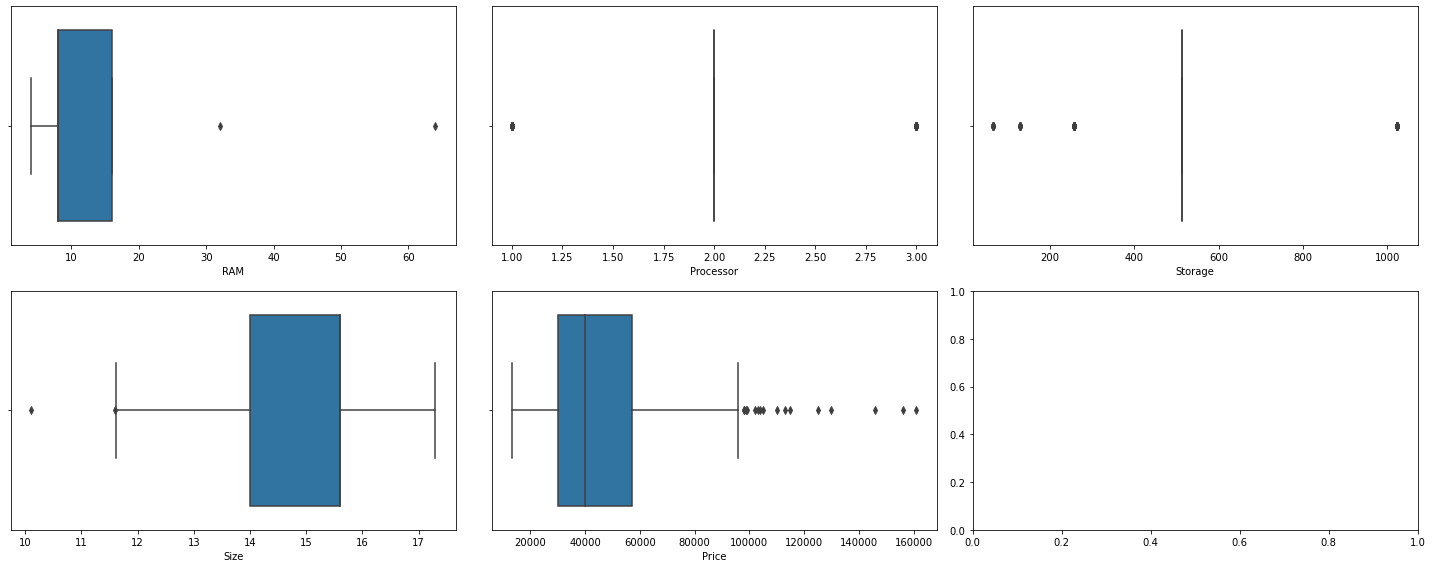

In [85]:
fig,axes=plt.subplots(2,3,figsize=(20,8))
Titles=["RAM","Processor","Storage","Size","Price"]
for i in range(5):
    row= i//3
    col= i%3
    ax=sns.boxplot(x=Titles[i],data=Data_dup,ax=axes[row,col])
plt.tight_layout()
plt.show()

In [86]:
Rq1=Data_dup.RAM.quantile(0.25)
Rq3=Data_dup.RAM.quantile(0.75)
Rmin=Rq1-1.5*(Rq3-Rq1)
Rmax=Rq3+1.5*(Rq3-Rq1)
Routlier_flag= (Data_dup["RAM"]<Rmin)|(Data_dup["RAM"]>Rmax)
RNormal_flag= (Data_dup["RAM"]>=Rmin)&(Data_dup["RAM"]<=Rmax)

In [87]:
Sq1=Data_dup.Size.quantile(0.25)
Sq3=Data_dup.Size.quantile(0.75)
Smin=Sq1-1.5*(Sq3-Sq1)
Smax=Sq3+1.5*(Sq3-Sq1)
Soutlier_flag= (Data_dup["Size"]<Smin)|(Data_dup["Size"]>Smax)
SNormal_flag= (Data_dup["Size"]>=Smin)&(Data_dup["Size"]<=Smax)

In [88]:
Pq1=Data_dup.Price.quantile(0.25)
Pq3=Data_dup.Price.quantile(0.75)
Pmin=Pq1-1.5*(Pq3-Pq1)
Pmax=Pq3+1.5*(Pq3-Pq1)
Poutlier_flag= (Data_dup["Price"]<Pmin)|(Data_dup["Price"]>Pmax)
PNormal_flag= (Data_dup["Price"]>=Pmin)&(Data_dup["Price"]<=Pmax)

In [89]:
outlier_data=Data_dup[Routlier_flag|Soutlier_flag|Poutlier_flag][:]
Data_dup=Data_dup[RNormal_flag & SNormal_flag & PNormal_flag][:]

In [90]:

x=Data_dup.drop(Data_dup.columns[[0,1,6,7,8,9,10,11]],axis=1)

Here we are not Excluding the outliers from the Processor and Storage Features because they are not continuous and even the outliers here are significant like when compared with mid generation processors there are very less Low and High generation processors but they matters when people want to buy in those sections and even in the case of storage feature there are more number of 512GB laptops than 256GB laptops.

# Creating the Model

In [91]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA

### Scaling the data such that their mean is 0 and their standard deviation is at max 1

In [92]:
scale=StandardScaler()


x=np.array(x)

scale.fit(x)

x=scale.transform(x)

Plotting the Bent elbow,Dendogram to check for the number of clusters.

1. Bent Elbow curve

In [93]:
error=[]
for i in range(1,18):
        kmeans=KMeans(n_clusters=i,n_init="auto")
        kmeans.fit(x)
        error.append(kmeans.inertia_)


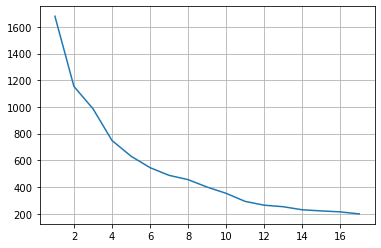

In [94]:
plt.plot(range(1,18),error)
plt.grid()
plt.show()

 Here, it is unclear that where the elbow is, we cant find the number of clusters from this.

2. Dendogram

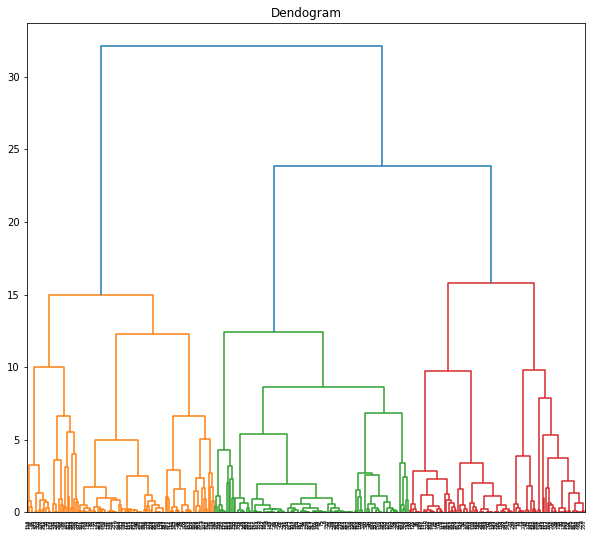

In [129]:
plt.figure(figsize=(10,9))
plt.title("Dendogram")
dend=shc.dendrogram(shc.linkage(x,method="ward"))

Here, from the dendogram plot we can say that the inter clustering is either 3 or 4.

### Now we are considering Heirarchial Clustering over kmeans clustering beacause of its iterartive nature i.e, when we given a new data it reforms the clustering according to new data so, that we can have more similar cluster than we get from basic kmeans clustering which forms from the basis of centroid.(due to small size data the iteration of all the data is not a problem for now)

In [130]:
N_cluster=3
Model=AgglomerativeClustering(n_clusters=N_cluster)

Model.fit(x)
 
Data_dup["Cluster"]= Model.labels_

### According to research the size of a good cluster should be between 5% and 35% of total size.

In [131]:
s=0
for i in Data_dup["Cluster"].unique():
    s=Data_dup[Data_dup["Cluster"]==i]["Cluster"].count()
    percent=s*100/355
    print(f"Cluster{i} population:{percent:0.2f}")

Cluster0 population:29.86
Cluster2 population:32.96
Cluster1 population:31.83


### Principal Component Analysis (PCA)

In [123]:
pca=PCA()

pca.fit(x)

pca_data=pca.transform(x)

percentage of each Principal component in the linear vector

In [124]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+ str(i) for i in range(1,len(per_var)+1)]


#### Scree Plot

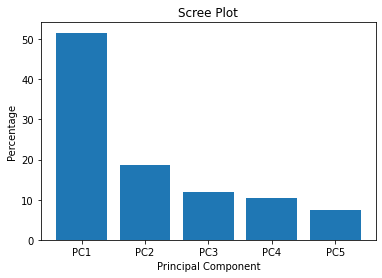

In [125]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Percentage")
plt.show()

Here, from the scree plot we can see that the "PC1" have percentage and mainly dependent variable in the cluster and next to that is "PC2". So, by using both the PC1 and PC2 we can visualize the clustering. 

#### Visualizing the Clusters in 2D Scatter Plot using the PCA

In [126]:
pca_df=pd.DataFrame(pca_data,columns=labels)

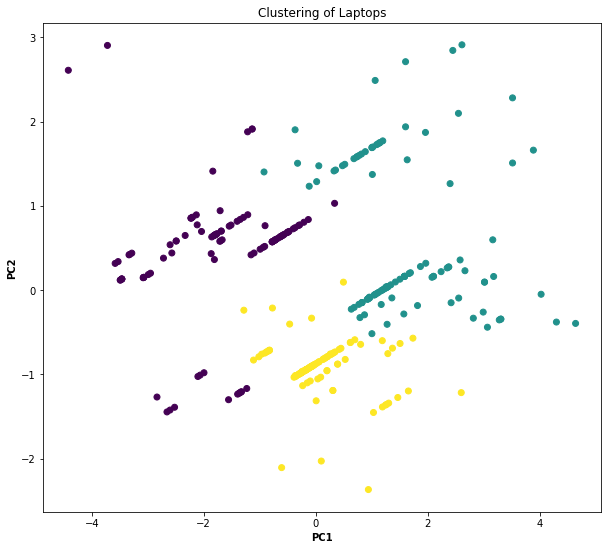

In [132]:
plt.figure(figsize=(10,9))
plt.scatter(pca_df["PC1"],pca_df["PC2"],c=Data_dup["Cluster"])
plt.xlabel('PC1', fontweight ='bold') 
plt.ylabel('PC2', fontweight ='bold') 
plt.title("Clustering of Laptops")
plt.show()

### How good is the clustering?

In [128]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("silhouette_score:",silhouette_score(x,Model.labels_))

print("calinski_harabasz_score:",calinski_harabasz_score(x,Model.labels_))

silhouette_score: 0.3554319240222683
calinski_harabasz_score: 135.13784192329877


Both the Silhouette Score and CH Score should be maximum for the best clustering which measures data point similarity with the points of the same cluster and how different from the points of the other clusters.(For the Silhouette Score 1 is the maximum score but no limit for CH Score).

# Fitting the new data to the Agglomerative Model.


Adding New data to the existing data for the prediction.

In [139]:
Processor= 3
RAM= 16
Storage= 512
Size= 15.6
Price= 80000

In [140]:
New_data= list(x) 

for i in range(1):
    New_data.append(scale.transform([[Processor,RAM,Storage,Size,Price]])[0])

In [141]:
new_labels=Model.fit_predict(New_data)

The New Prediction Cluster Value.

In [142]:
New_Prediction_Cluster_Number=new_labels[len(x):]+1

Updating the Previous Cluster Values

In [143]:
Data_dup["Cluster"]=new_labels[:len(x)]+1

In [144]:
Cluster_Number=New_Prediction_Cluster_Number[0]

### Merging the Outlier data with Normalized Data (i.e; Data_dup) after assaigning it as cluster number "4" and then updating the all data with their cluster numbers in main dataframe (i.e;Data).

In [145]:
outlier_data["Cluster"]=N_cluster+1

Merged=pd.concat([Data_dup,outlier_data])

Data["Cluster"]=Merged["Cluster"]

In [146]:
Result=Data[Data["Cluster"]==Cluster_Number]

Result

,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed,Rating,Price,PType,Cluster
4,LENOVO,Lenovo ThinkPad,i5,16,256,14.000,0,0,0,1,1,3.3,14999.0,2,2
9,LENOVO,Lenovo Ideapad,Ryzen 5 7520U,16,512,15.600,0,0,0,1,0,3.9,43990.0,2,2
15,MSI,MSI Modern,i5-1155,16,512,15.748,0,0,0,1,0,3.8,39990.0,2,2
19,LENOVO,Lenovo IdeaPad,Intel Core i5 12,16,512,15.600,0,0,0,1,0,4.0,55490.0,2,2
26,ACER,Acer Aspire,i3,16,512,15.600,0,1,0,1,0,5.0,39990.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,ZEBRONICS,ZEBRONICS NBC,Intel Core i7 12,16,1024,15.600,0,1,0,1,0,4.0,52990.0,3,2
340,MSI,MSI Bravo,Ryzen 5 7535H,16,512,15.748,1,0,0,1,0,3.3,57990.0,2,2
345,LENOVO,Lenovo IdeaPad,Intel Core i5 13420,16,512,14.000,0,0,0,1,0,3.9,68990.0,2,2
351,DELL,Dell G15,i5-12500,16,1024,15.600,1,0,0,1,0,4.1,77490.0,2,2


# Filetring 

Function for Boolian value of each feature and its value on the basis of whether it is Preferable one or not

In [147]:
def Bool_(value,feature):
    return not(value) or (bool(value) and (Data[feature]==value))

Function for Filtering the Prefered feature values in the Resultant cluster

In [148]:
def Filter(Brand_,Processor_,RAM_,Storage_,Size_,Gaming_,FingerPrint_,OLED_,SSD_,Renewed_,PType_,data):
    Values=[Brand_,Processor_,RAM_,Storage_,Size_,Gaming_,FingerPrint_,OLED_,SSD_,Renewed_,PType_]
    Variables=["Brand","Processor","RAM","Storage","Size","Gaming","FingerPrint","OLED","SSD","Renewed","PType"]
    Bool_flag=True
    for i,j in zip(Values,Variables):
        Bool_flag = Bool_flag & Bool_(i,j)
    try: 
        return data[Bool_flag][:] 
    except: 
        return data

Assign the values if you want to filter the perticular feature in their respective Tab else leave it as None.

In [159]:
Brand_filter = None
Processor_filter= None
RAM_filter= None
Storage_filter= None
Size_filter= None
Gaming_filter= None
FingerPrint_filter= None
OLED_filter= None
SSD_filter= None
Renewed_filter= None
PType_filter=None

# Final Reuslt after Filtering

In [160]:
Final_Result=Filter(Brand_filter,Processor_filter,RAM_filter,Storage_filter,Size_filter,Gaming_filter,FingerPrint_filter,OLED_filter,SSD_filter,Renewed_filter,PType_filter,Result)
Final_Result

,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed,Rating,Price,PType,Cluster
4,LENOVO,Lenovo ThinkPad,i5,16,256,14.000,0,0,0,1,1,3.3,14999.0,2,2
9,LENOVO,Lenovo Ideapad,Ryzen 5 7520U,16,512,15.600,0,0,0,1,0,3.9,43990.0,2,2
15,MSI,MSI Modern,i5-1155,16,512,15.748,0,0,0,1,0,3.8,39990.0,2,2
19,LENOVO,Lenovo IdeaPad,Intel Core i5 12,16,512,15.600,0,0,0,1,0,4.0,55490.0,2,2
26,ACER,Acer Aspire,i3,16,512,15.600,0,1,0,1,0,5.0,39990.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,ZEBRONICS,ZEBRONICS NBC,Intel Core i7 12,16,1024,15.600,0,1,0,1,0,4.0,52990.0,3,2
340,MSI,MSI Bravo,Ryzen 5 7535H,16,512,15.748,1,0,0,1,0,3.3,57990.0,2,2
345,LENOVO,Lenovo IdeaPad,Intel Core i5 13420,16,512,14.000,0,0,0,1,0,3.9,68990.0,2,2
351,DELL,Dell G15,i5-12500,16,1024,15.600,1,0,0,1,0,4.1,77490.0,2,2


### Note: If you want the High Generation laptops then please check even the outlier cluster because this cluster mostly consisits with that laptops

In [161]:
Brand_filter_o = None
Processor_filter_o= None
RAM_filter_o= None
Storage_filter_o= None
Size_filter_o= None
Gaming_filter_o= None
FingerPrint_filter_o= None
OLED_filter_o= None
SSD_filter_o= None
Renewed_filter_o= None
PType_filter_o=None

In [162]:
O_data=Data[Data["Cluster"]==N_cluster+1]
outlier_result=Filter(Brand_filter_o,Processor_filter_o,RAM_filter_o,Storage_filter_o,Size_filter_o,Gaming_filter_o,FingerPrint_filter_o,OLED_filter_o,SSD_filter_o,Renewed_filter_o,PType_filter_o,O_data)
O_data

,Brand,ProductName,Processor,RAM,Storage,Size,Gaming,FingerPrint,OLED,SSD,Renewed,Rating,Price,PType,Cluster
75,DELL,Dell Inspiron,i7-1360,16,1024,13.300000,0,0,0,1,0,5.000000,98990.0,3,4
96,HP,HP Envy,i7 14,16,1024,14.000000,0,0,0,1,0,3.700000,101999.0,3,4
104,MICROSOFT,Microsoft Surface,Intel Core i5 12,8,256,13.500000,0,0,0,1,0,3.835312,97990.0,2,4
122,ACER,Acer Predator,i9,16,1024,16.000000,1,0,0,1,0,4.300000,160991.0,3,4
152,ASUS,ASUS Vivobook,i9-13900,16,1024,14.000000,0,1,1,1,0,3.900000,109990.0,3,4
163,SAMSUNG,Samsung Galaxy,i5,16,512,15.992094,0,0,0,1,0,4.200000,145990.0,2,4
172,LENOVO,Lenovo Legion,Ryzen 7 5800H,32,1024,16.000000,1,0,0,1,0,4.500000,129990.0,3,4
173,LENOVO,Lenovo Legion,Ryzen 7 5800H,16,512,16.000000,1,0,0,1,0,4.500000,112990.0,3,4
181,LENOVO,Lenovo IdeaPad,Intel Celeron N4020 10,4,128,10.100000,0,0,0,0,0,3.800000,24990.0,1,4
252,LENOVO,Lenovo IdeaPad,Celeron N4020,4,64,11.600000,0,0,0,0,0,4.400000,18990.0,1,4


# Final Distribution Of the Resultant List of Laptops

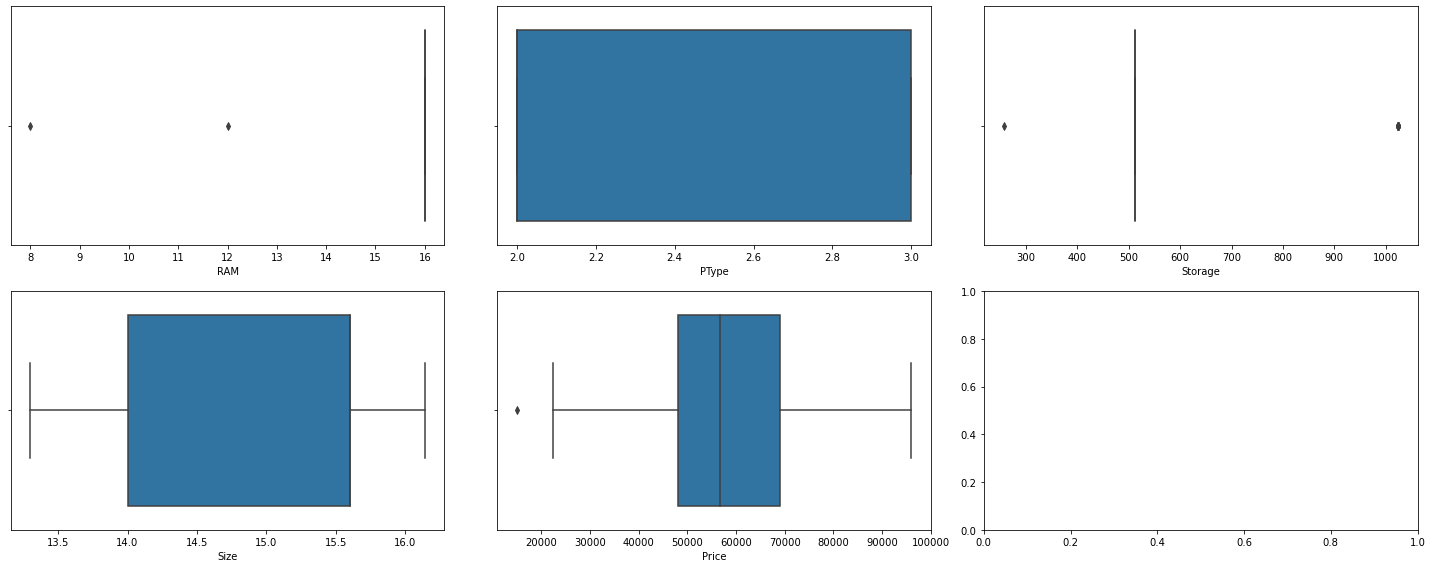

In [163]:
fig,axes=plt.subplots(2,3,figsize=(20,8))
Titles=["RAM","PType","Storage","Size","Price"]
for i in range(5):
    row=i//3
    col=i%3
    ax=sns.boxplot(Titles[i],data=Final_Result,ax=axes[row,col])
plt.tight_layout()
plt.show()

cluster 1 =>  mix of low end and mid generation.

cluster 2 => mix of mid and high generation.

cluster 3 => mid generation.

## Saving the Final Data

In [119]:
Data.to_excel("UpdatedLaptops.xlsx")

 Finally done with the model !!!

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------